In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

# KETENTUAN CITRA

**Kamera Pribadi**

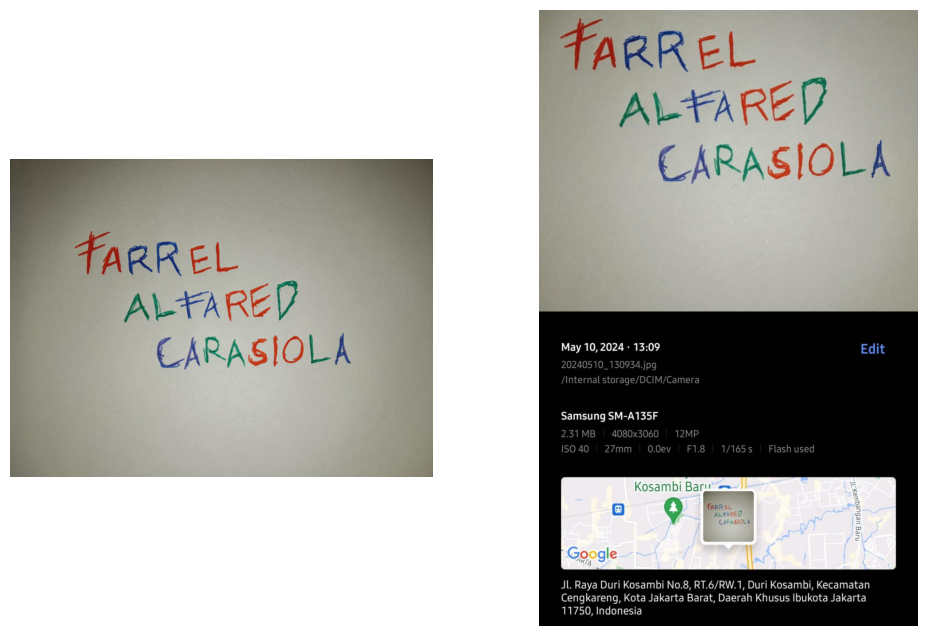

In [2]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar
img1 = cv2.imread('namaku.jpg')
img2 = cv2.imread('detail.jpg')

# Mengonversi warna BGR ke RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Menampilkan gambar pertama
axs[0].imshow(img1_rgb)
axs[0].axis('off')

# Menampilkan gambar kedua
axs[1].imshow(img2_rgb)
axs[1].axis('off')

plt.show()


# ------------------------------------------------------------------------------------------

# KETENTUAN PROJEK

**Membaca Gambar dan Menampilkan Gambar**

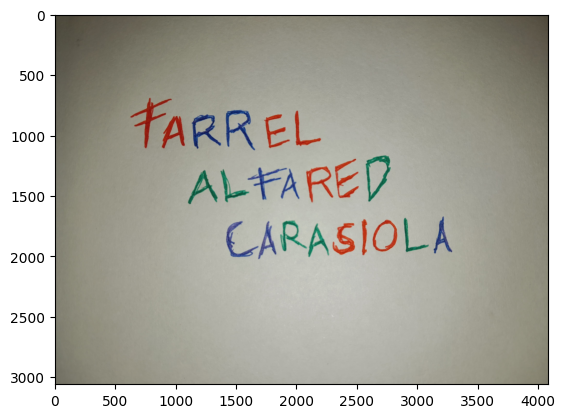

In [3]:
color_image = img.imread('namaku.jpg')
plt.imshow(color_image)

**Deteksi Warna pada Citra**

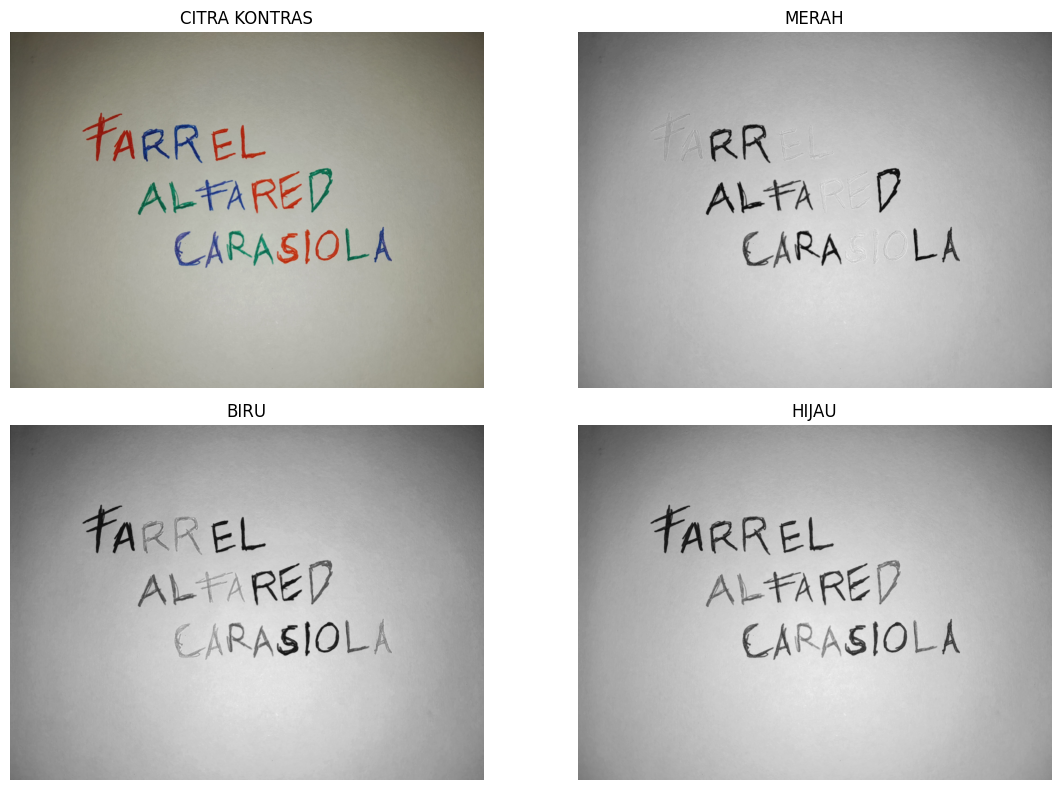

In [4]:
red = color_image[:, :, 0]
green = color_image[:, :, 1]
blue = color_image[:, :, 2]

f, ((x1, x2), (x3, x4)) = plt.subplots(2, 2, figsize=(12, 8))

x1.imshow(color_image)
x1.set_title('CITRA KONTRAS')
x1.axis('off')

x3.imshow(blue, cmap='gray')
x3.set_title('BIRU')
x3.axis('off')

x2.imshow(red, cmap='gray')
x2.set_title('MERAH')
x2.axis('off')

x4.imshow(green, cmap='gray')
x4.set_title('HIJAU')
x4.axis('off')

plt.tight_layout()  # Untuk memperbaiki tata letak subplot
plt.show()

**Nilai Ambang Batas Citra**

In [5]:
color_image = cv2.imread('namaku.jpg')
img_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

In [6]:
# Menghitung histogram untuk setiap kanal atau citra kontras
hist_kontras = cv2.calcHist([color_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_red = cv2.calcHist([color_image], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([color_image], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([color_image], [2], None, [256], [0, 256])
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Mendapatkan nilai maksimum dari setiap histogram
max_kontras = max(hist_kontras.max(), hist_red.max(), hist_green.max(), hist_blue.max(), hist_gray.max())

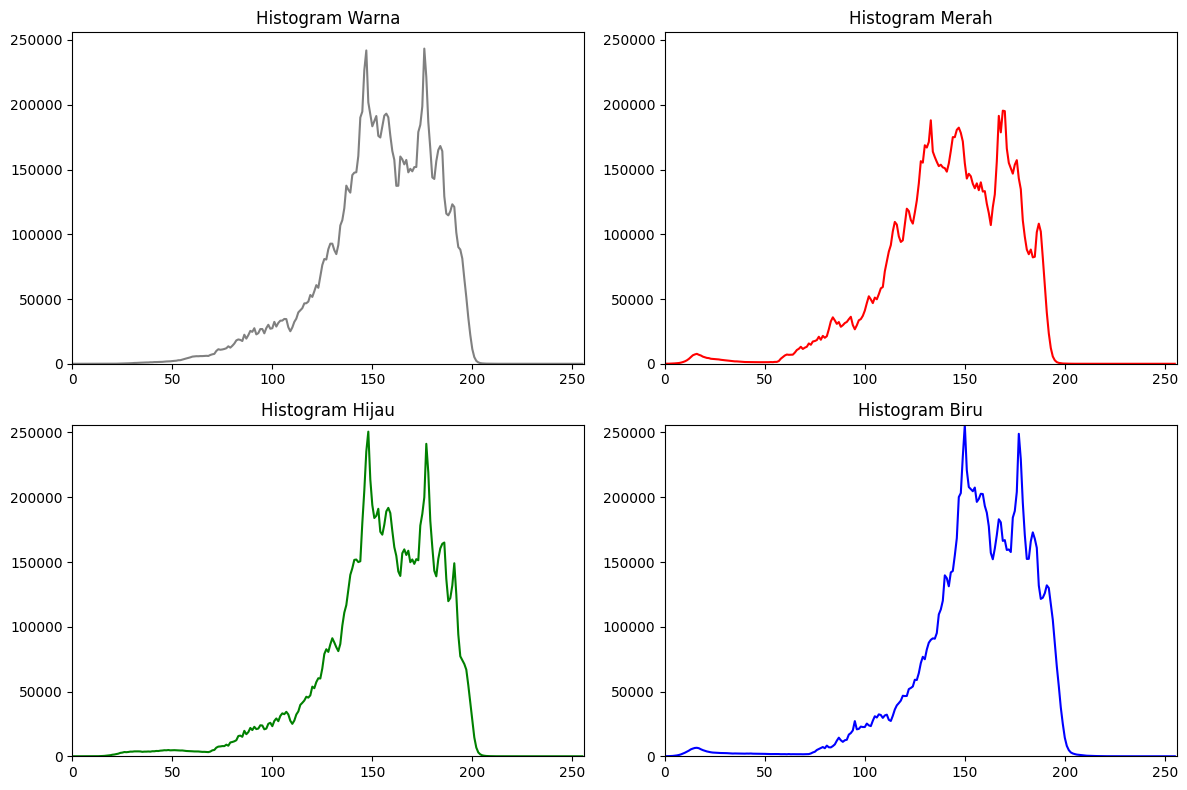

In [7]:
# Plot histogram
f, ((x1, x2), (x3, x4)) = plt.subplots(2, 2, figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(hist_gray, color='grey')
plt.title('Histogram Warna')
plt.xlim([0, 256])
plt.ylim([0, max_kontras])

plt.subplot(2, 2, 2)
plt.plot(hist_red, color='red')
plt.title('Histogram Merah')
plt.xlim([0, 256])
plt.ylim([0, max_kontras])

plt.subplot(2, 2, 3)
plt.plot(hist_green, color='green')
plt.title('Histogram Hijau')
plt.xlim([0, 256])
plt.ylim([0, max_kontras])

plt.subplot(2, 2, 4)
plt.plot(hist_blue, color='blue')
plt.title('Histogram Biru')
plt.xlim([0, 256])
plt.ylim([0, max_kontras])

plt.tight_layout()
plt.show()

**Nilai Ambang Batas Citra & Kategori Warna pada Citra**

In [8]:
# Membaca gambar
color_image = cv2.imread('namaku.jpg')

# Konversi citra ke dalam ruang warna HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

In [9]:
# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

In [10]:
# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = np.maximum(mask_red1, mask_red2)

In [11]:
# Gabungkan masker untuk warna merah dan biru
mask_red_blue = np.maximum(mask_red, mask_blue)

# Gabungkan masker untuk warna merah dan biru
mask_red_blue_green = np.maximum(mask_red_blue, mask_green)

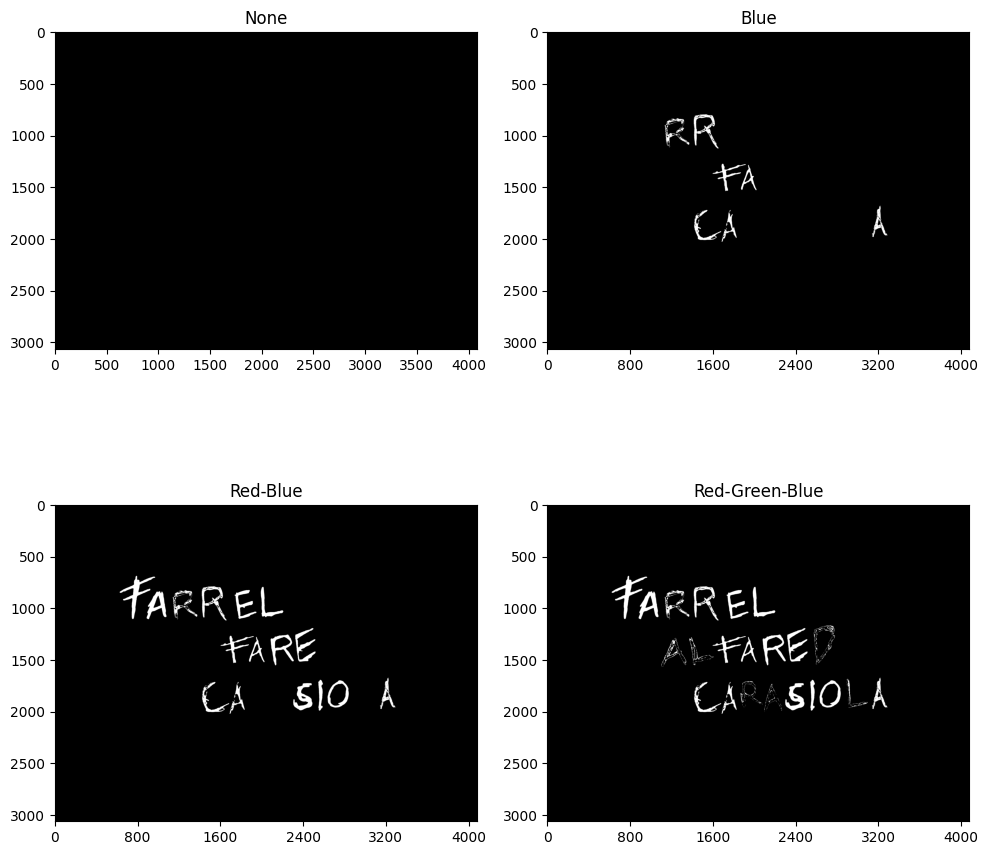

In [12]:
# Plot hasil
gray = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY) 
axs[0, 0].imshow(binary1, cmap='gray') 
axs[0, 0].set_title('None') 

plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('Red-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(mask_red_blue_green, cmap='gray')
plt.title('Red-Green-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')


plt.tight_layout()
plt.show()